#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Linear Algebra

You have all seen basic linear algebra before, but this will summarize some different ways of thinking about the fundamental operations.  It also presents concepts in a different order than Sauer's book.

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the Python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Python syntax is `A[:,j]` and `A[i,:]`.

In [1]:
%matplotlib notebook
import numpy
from matplotlib import pyplot

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = numpy.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

A = numpy.array([[1,2],[3,5],[7,11]])
x = numpy.array([10,20])
matmult1(A, x)

array([ 50, 130, 290])

In [2]:
def matmult2(A, x):
    """Same idea, but more compactly"""
    y = numpy.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

matmult2(A, x)

array([ 50, 130, 290])

In [3]:
def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = numpy.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

matmult3(A, x)

array([ 50, 130, 290])

In [4]:
# We will use this version
A.dot(x)

array([ 50, 130, 290])

### Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though it's not as "bad" as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [5]:
B = numpy.array([[2, 3],[0, 4]])
print(B)
print(B.dot(B.T), B.T.dot(B))
Binv = numpy.linalg.inv(B)
Binv.dot(B), B.dot(Binv)

[[2 3]
 [0 4]]
[[13 12]
 [12 16]] [[ 4  6]
 [ 6 25]]


(array([[ 1.,  0.],
        [ 0.,  1.]]), array([[ 1.,  0.],
        [ 0.,  1.]]))

### Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

In [6]:
x = numpy.linspace(-1,1)
A = numpy.array([x**3, x**2, x, 1+0*x]).T
print('shape =', A.shape)  # This is a tall matrix with 4 columns
pyplot.figure()
pyplot.plot(x, A)
pyplot.ylim((-1.1,1.1))
pyplot.style.use('ggplot')
pyplot.show()

shape = (50, 4)


<IPython.core.display.Javascript object>

* This type of matrix is very common; we can also create it with `numpy.vander`.

We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ 5x^3 - 3x = \Bigg[ x^3 \Bigg|\, x^2 \Bigg|\, x \,\Bigg|\, 1 \Bigg] \begin{bmatrix}5 \\ 0 \\ -3 \\ 0 \end{bmatrix} . $$

In [7]:
pyplot.figure()
p = numpy.array([5,0,-3,0])
pyplot.plot(x, A.dot(p))

<IPython.core.display.Javascript object>

Now suppose we know the value of a polynomial at a few points.
We can use the Vandermonde matrix to find a polynomial through those points.

In [8]:
x1 = numpy.array([-0.9, 0.1, 0.5, 0.8])  # points where we know values
y = numpy.array([1, 2.4, -0.2, 1.3])     # values at those points
pyplot.figure()
pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

<IPython.core.display.Javascript object>

[ 12.98319328  -1.74789916  -9.47605042   3.35210084]
B = [[-0.729  0.81  -0.9    1.   ]
 [ 0.001  0.01   0.1    1.   ]
 [ 0.125  0.25   0.5    1.   ]
 [ 0.512  0.64   0.8    1.   ]] 
p = [ 12.98319328  -1.74789916  -9.47605042   3.35210084]


Evidently $p(x) = 12.983 x^3 - 1.748 x^2 - 9.476 x + 3.352$ is the unique cubic polynomial that interpolates those points.
Applying $B^{-1}$ converted from the values at the marked points to the polynomial coefficients.

## Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$
The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X .$$

### Orthogonal matrices

If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$").
A vector is said to be **normalized** if $\lVert x \rVert = 1$.
If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**.
A matrix with orthonormal columns is said to be an **orthogonal matrix**.
We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are linearly independent.
The inverse of a *square* orthogonal matrix is its transpose:
$$ Q^T Q = Q Q^T = I . $$
Orthogonal matrices are a powerful building block for robust numerical algorithms.

In [9]:
# Make some polynomials
q0 = A.dot(numpy.array([0,0,0,.5]))  # .5
q1 = A.dot(numpy.array([0,0,1,0]))  # x
q2 = A.dot(numpy.array([0,1,0,0]))  # x^2

pyplot.figure()
pyplot.plot(x, numpy.array([q0, q1, q2]).T)

<IPython.core.display.Javascript object>

In [10]:
# Inner products of even and odd functions

q0 = q0 / numpy.linalg.norm(q0)
q1.dot(q0), q2.dot(q0), q2.dot(q1)

(-7.4940054162198066e-16, 2.4532276081982256, -3.5527136788005009e-15)

In [11]:
# What is the constant component of q2?

pyplot.figure()
pyplot.plot(x, q2.dot(q0)*q0)

<IPython.core.display.Javascript object>

In [12]:
# Let's project that away so that q2 is orthogonal to q0

q2 = q2 - q2.dot(q0)*q0

Q = numpy.array([q0, q1, q2]).T
print(Q.T.dot(Q))
pyplot.figure()
pyplot.plot(x, Q)

[[  1.00000000e+00  -7.49400542e-16   1.66533454e-16]
 [ -7.49400542e-16   1.73469388e+01  -9.99200722e-16]
 [  1.66533454e-16  -9.99200722e-16   4.80888065e+00]]


<IPython.core.display.Javascript object>

## Gram-Schmidt Orthogonalization

Given a collection of vectors (columns of a matrix), we can find an orthogonal basis by applying the above procedure one column at a time.

[[  1.00000000e+00   2.91433544e-16   1.24900090e-16  -2.28983499e-16]
 [  2.91433544e-16   1.00000000e+00   1.38777878e-17  -4.30211422e-16]
 [  1.24900090e-16   1.38777878e-17   1.00000000e+00  -4.51028104e-17]
 [ -2.28983499e-16  -4.30211422e-16  -4.51028104e-17   1.00000000e+00]]
6.72043887442e-16


<IPython.core.display.Javascript object>


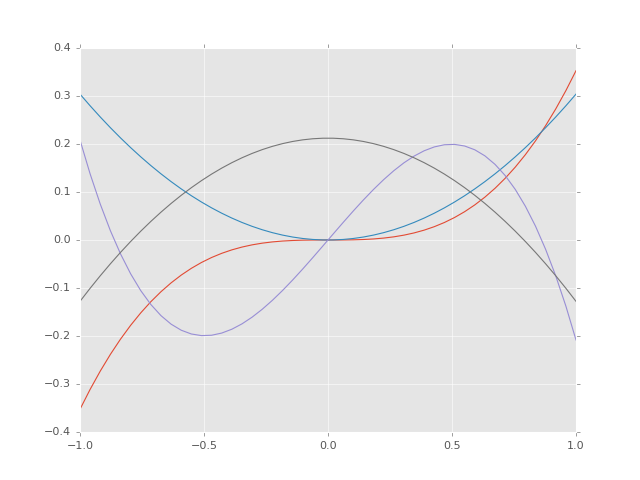

In [15]:
def gram_schmidt_naive(X):
    Q = numpy.zeros_like(X)
    R = numpy.zeros((len(X.T),len(X.T)))
    for i in range(len(Q.T)):
        v = X[:,i].copy()
        for j in range(i):
            r = v.dot(Q[:,j])
            R[j,i] = r
            v -= r * Q[:,j]    # "modified Gram-Schmidt" - remove each component before next dot product
        R[i,i] = numpy.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

Q, R = gram_schmidt_naive(A)
print(Q.T.dot(Q))
print(numpy.linalg.norm(Q.dot(R)-A))
pyplot.figure()
pyplot.plot(x, Q)

<IPython.core.display.Javascript object>


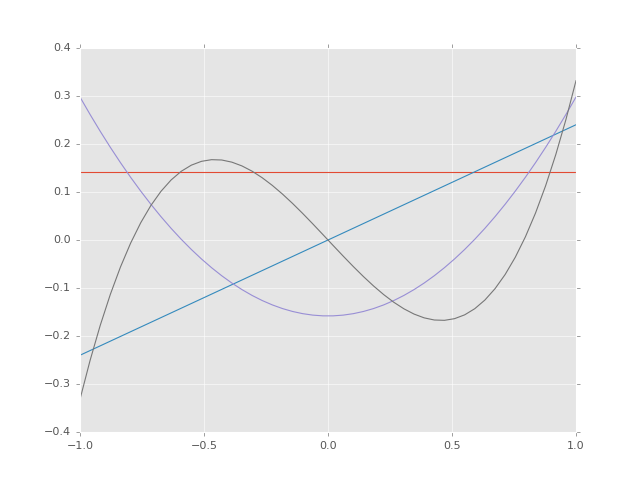

In [21]:
Q, R = gram_schmidt_naive(numpy.vander(x, 4, increasing=True))
pyplot.figure()
pyplot.plot(x, Q)

### Theorem: all full-rank $m\times n$ matrices ($m \ge n$) have a unique $Q R$ factorization with $R_{j,j} > 0$.

### Orthogonal polynomials

We used `x = numpy.linspace(-1,1)` which uses $m=50$ points by default.  The number 50 is arbitrary and as we use more points, our columns become better approximations of continuous functions and the vector inner product becomes an integral (up to scaling):
$$ \frac 2 m \sum_{i=1}^m p_i q_i \approx \int_{-1}^1 p(x) q(x) . $$

When we orthogonalize the monomials using this inner product, we get the [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) (up to scaling).  These polynomials have important applications in physics and engineering, as well as playing an important role in approximation (which we will go into in more detail).

### Solving equations using QR

To solve
$$ A x = b $$
we can compute $A = QR$ and then
$$ x = R^{-1} Q^T b . $$

This also works for non-square systems!

<IPython.core.display.Javascript object>


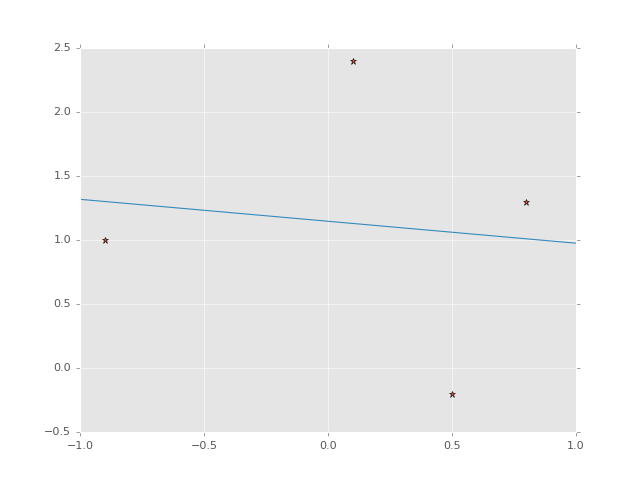

[-0.17147193  1.14643399]
B = [[-0.9  1. ]
 [ 0.1  1. ]
 [ 0.5  1. ]
 [ 0.8  1. ]] 
p = [-0.17147193  1.14643399]


In [22]:
x1 = numpy.array([-0.9, 0.1, 0.5, 0.8])  # points where we know values
y = numpy.array([1, 2.4, -0.2, 1.3])     # values at those points
pyplot.figure()
pyplot.plot(x1, y, '*')
B = numpy.vander(x1, 2)                     # Vandermonde matrix at the known points
Q, R = gram_schmidt_naive(B)
p = numpy.linalg.solve(R, Q.T.dot(y))             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, numpy.vander(x,2).dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

In [23]:
m = 20
V = numpy.vander(numpy.linspace(-1,1,m), increasing=False)
Q, R = gram_schmidt_naive(V)

def qr_test(qr, V):
    Q, R = qr(V)
    m = len(Q.T)
    print(qr.__name__, numpy.linalg.norm(Q.dot(R) - V), numpy.linalg.norm(Q.T.dot(Q) - numpy.eye(m)))
    
qr_test(gram_schmidt_naive, V)
qr_test(numpy.linalg.qr, V)

gram_schmidt_naive 1.22046927257e-15 1.86469927987e-08
qr 5.89181489555e-15 2.97458960556e-15


In [24]:
def gram_schmidt_classical(X):
    Q = numpy.zeros_like(X)
    R = numpy.zeros((len(X.T),len(X.T)))
    for i in range(len(Q.T)):
        v = X[:,i].copy()
        R[:i,i] = Q[:,:i].T.dot(v)
        v -= Q[:,:i].dot(R[:i,i])
        R[i,i] = numpy.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

qr_test(gram_schmidt_classical, V)

gram_schmidt_classical 1.11926691633e-16 2.97851950621


Classical Gram-Schmidt is highly parallel, but unstable, as evidenced by the lack of orthogonality in $Q$.

### Right-looking algorithms

The implementations above have been "left-looking"; when working on column $i$, we compare it only to columns to the left (i.e., $j < i$).  We can reorder the algorithm to look to the right by projecting $q_i$ out of all columns $j > i$.  This algorithm is stable while being just as parallel as `gram_schmidt_classical`.

In [25]:
def gram_schmidt_modified(X):
    Q = X.copy()
    R = numpy.zeros((len(X.T), len(X.T)))
    for i in range(len(Q.T)):
        R[i,i] = numpy.linalg.norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:] = Q[:,i+1:].T.dot(Q[:,i])
        Q[:,i+1:] -= numpy.outer(Q[:,i], R[i,i+1:])
    return Q, R

qr_test(gram_schmidt_modified, V)

gram_schmidt_modified 1.22046927257e-15 1.86469927987e-08


### Householder triangularization

Gram-Schmidt methods perform triangular transformations to build an orthogonal matrix.  As we have seen, $X = QR$ is satisfied accurately, but $Q$ may not be orthogonal when $X$ is ill-conditioned.  Householder triangularization instead applies a sequence of orthogonal transformations to build a triangular matrix.

$$ \underbrace{Q_{n-1} \dotsb Q_0}_{Q^T} A = R $$

The structure of the algorithm is

$$ \underbrace{\begin{bmatrix} * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ \end{bmatrix}}_{A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ \end{bmatrix}}_{Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \\ 0 & 0 & * \\ \end{bmatrix}}_{Q_1 Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \\ 0 & 0 & 0 \\ \end{bmatrix}}_{Q_2 Q_1 Q_0 A}
$$

where the elementary orthogonal matrices $Q_i$ chosen to introduce zeros below the diagonal in the $i$th column of $R$.
Each of these transformations will have the form
$$Q_i = \begin{bmatrix} I_i & 0 \\ 0 & F \end{bmatrix}$$
where $F$ is a "reflection" that achieves
$$ F x = \begin{bmatrix} \lVert x \rVert \\ 0 \\ 0 \\ \vdots \end{bmatrix} $$
where $x$ is the column of $R$ from the diagonal down.
This transformation is a reflection across a plane with normal $v = Fx - x = \lVert x \rVert e_1 - x$.

![Householder Reflector (Trefethen and Bau, 1999)](figures/TB-Householder.png)

The reflection, as depected above by Trefethen and Bau (1999) can be written $F = I - 2 \frac{v v^T}{v^T v}$.

In [26]:
def householder_Q_times(V, x):
    """Apply orthogonal matrix represented as list of Householder reflectors"""
    y = x.copy()
    for i in reversed(range(len(V))):
        y[i:] -= 2 * V[i] * V[i].dot(y[i:])
    return y

def qr_householder1(A):
    "Compute QR factorization using naive Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        x = R[i:,i]
        v = -x
        v[0] += numpy.linalg.norm(x)
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = numpy.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, numpy.triu(R[:n,:])

qr_test(qr_householder1, numpy.array([[1.,2],[3,4],[5,6]]))

qr_householder1 1.83102671941e-15 3.23682852457e-16


In [27]:
qr_test(qr_householder1, V)
qr_test(numpy.linalg.qr, V)

qr_householder1 6.66577491755e-15 2.99974677314e-15
qr 5.89181489555e-15 2.97458960556e-15


### Choice of two projections

It turns out our implementation has a nasty deficiency.

In [28]:
qr_test(qr_householder1, numpy.eye(1))

qr_householder1 nan nan


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


In [29]:
qr_test(qr_householder1, numpy.eye(3,2))

qr_householder1 nan nan


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


Inside `qr_householder1`, we have the lines
```
        x = R[i:,i]
        v = -x
        v[0] += numpy.linalg.norm(x)
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
```
What happens when $$x = \begin{bmatrix}1 \\ 0 \end{bmatrix}$$
(i.e., the column of $R$ is already upper triangular)?

We are trying to define a reflector plane (via its normal vector) from the zero vector,
$$v = \lVert x \rVert e_0 - x .$$
When we try to normalize this vector, we divide zero by zero and the algorithm breaks down (`nan`).  Maybe we just need to test for this special case and "skip ahead" when no reflection is needed?  And if so, how would we define $Q$?

In [30]:
qr_test(qr_householder1, numpy.array([[1.,1], [1e-8,1]]))
print(qr_householder1(numpy.array([[1.,1], [1e-8,1]])))

qr_householder1 1e-08 0.0
(array([[ 1.,  0.],
       [ 0.,  1.]]), array([[ 1.,  1.],
       [ 0.,  1.]]))


The error $QR - A$ is still $10^{-8}$ for this very well-conditioned matrix so something else must be at play here.

![Choosing the better of two Householder reflectors (Trefethen and Bau, 1999).](figures/TB-Householder2.png)

In [31]:
def qr_householder2(A):
    "Compute QR factorization using Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        v = R[i:,i].copy()
        v[0] += numpy.sign(v[0])*numpy.linalg.norm(v) # Choose the further of the two reflections
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = numpy.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, numpy.triu(R[:n,:])

qr_test(qr_householder2, numpy.eye(3,2))
qr_test(qr_householder2, numpy.array([[1.,1], [1e-8,1]]))
qr_householder2(numpy.array([[1.,1], [1e-8,1]]))

qr_test(qr_householder2, V)

qr_householder2 0.0 0.0
qr_householder2 0.0 0.0
qr_householder2 6.34323888919e-15 2.31937137379e-15


We now have a usable implementation of Householder QR.  There are some further concerns for factoring rank-deficient matrices.  We will visit the concept of pivoting later, in the context of LU and Cholesky factorization.

## Condition number of a matrix

We may have informally referred to a matrix as "ill-conditioned" when the columns are nearly linearly dependent, but let's make this concept for precise.  Recall the definition of (relative) condition number from the Rootfinding notes,

$$ \kappa = \max_{\delta x} \frac{|\delta f|/|f|}{|\delta x|/|x|} . $$

We understood this definition for scalar problems, but it also makes sense when the inputs and/or outputs are vectors (or matrices, etc.) and absolute value is replaced by vector (or matrix) norms.  Let's consider the case of matrix-vector multiplication, for which $f(x) = A x$.

$$ \kappa(A) = \max_{\delta x} \frac{\lVert A (x+\delta x) - A x \rVert/\lVert A x \rVert}{\lVert \delta x\rVert/\lVert x \rVert}
= \max_{\delta x} \frac{\lVert A \delta x \rVert}{\lVert \delta x \rVert} \, \frac{\lVert x \rVert}{\lVert A x \rVert} = \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} . $$

There are two problems here:

* I wrote $\kappa(A)$ but my formula depends on $x$.
* What is that $\lVert A \rVert$ beastie?

### Stack push: Matrix norms

Vector norms are built into the linear space (and defined in term of the inner product).  Matrix norms are *induced* by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} . $$

* This equation makes sense for non-square matrices -- the vector norms of the input and output spaces may differ.
* Due to linearity, all that matters is direction of $x$, so it could equivalently be written

$$ \lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert . $$

### Stack pop

Now we understand the formula for condition number, but it depends on $x$.  Consider the matrix

$$ A = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} . $$

* What is the norm of this matrix?
* What is the condition number when $x = [1,0]^T$?
* What is the condition number when $x = [0,1]^T$?

The condition number of matrix-vector multiplication depends on the vector.  The condition number of the matrix is the worst case (maximum) of the condition number for any vector, i.e.,

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} .$$

If $A$ is invertible, then we can rephrase as

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} =
\max_{A x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} = \lVert A \rVert \lVert A^{-1} \rVert . $$

Evidently multiplying by a matrix is just as ill-conditioned of an operation as solving a linear system using that matrix.